In [42]:
import math
import numpy as np;
import matplotlib.pyplot as plt

In [58]:
def inf_n(z, a):
    return 1-(9*a)/(8*z)+math.pow(a,3)/(2*math.pow(z,3))-math.pow(a,5)/(8*math.pow(z,5))

def inf_t(z, a):
    return 1-(9*a)/(16*z)+2*math.pow(a,3)/(16*math.pow(z,3))-math.pow(a,5)/(16*math.pow(z,5))

def channel_n(z,a,L):
    dom = 12
    term1 = 0
    term2 = 0
    
    for n in range(0,dom):
        term1 = term1 + math.pow(-1,n)*(1/inf_n(n*L+z,a) -1)
        
    for n in range(0,dom):
        term2 = term2 + math.pow(-1,n)*(1/inf_n((n+1)*L-z,a) -1)
        
    return 1/(term1+term2+1)
    
channel_n_vec = np.vectorize(channel_n)

def channel_t(z,a,L):
    dom = 12
    term1 = 0
    term2 = 0
    
    for n in range(0,dom):
        term1 = term1 + math.pow(-1,n)*(1/(inf_t(z,a)*(n*L+a)) -1)
        
    for n in range(0,dom):
        term2 = term2 + math.pow(-1,n)*(1/(inf_t(z,a)*((n+1)*L-a)) -1)
        
    return 1/(term1+term2+1)
    
channel_t_vec = np.vectorize(channel_t)



def fit_wall_mob(h, p1, p2, p3, p4, p5, p6, p7):
    return p1 + p2/pow(p3  + h,5) - p4/pow(p5   + h,3) - p6/(p7  + h)

def inf_n(z, a):
    return 1-(9*a)/(8*z)+math.pow(a,3)/(2*math.pow(z,3))-math.pow(a,5)/(8*math.pow(z,5))

def inf_t(z, a):
    return 1-(9*a)/(16*z)+math.pow(a,3)/(8*math.pow(z,3))-math.pow(a,5)/(16*math.pow(z,5))

def channel_n(z,a,L):
    dom = 8
    term1 = 0
    term2 = 0
    for n in range(0,dom):
        term1 = term1 + math.pow(-1,n)*(1/inf_n(n*L+z,a) -1)
    for n in range(0,dom):
        term2 = term2 + math.pow(-1,n)*(1/inf_n((n+1)*L-z,a) -1)
    return 1/(term1+term2+1)

def channel_t(z,a,L):
    dom = 8
    term1 = 0
    term2 = 0
    for n in range(0,dom):
        term1 = term1 + math.pow(-1,n)*(1/inf_t(n*L+z,a) -1)
    for n in range(0,dom):
        term2 = term2 + math.pow(-1,n)*(1/inf_t((n+1)*L-z,a) -1)
    return 1/(term1+term2+1)

channel_n_vec = np.vectorize(channel_n)
channel_t_vec = np.vectorize(channel_t)

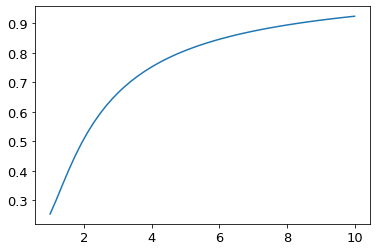

In [52]:
L=19.125
a=1
x=np.linspace(1,10,50)
y=channel_n_vec(x,a,L)

plt.plot(x,y)

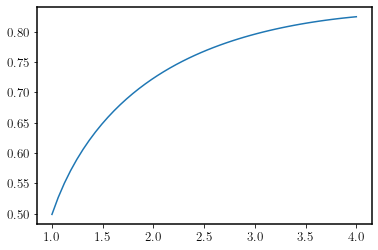

In [170]:
L=9.56
x=np.linspace(1,4,50)
y=channel_t_vec(x,1,L)

plt.plot(x,y)

0.8308496352377465


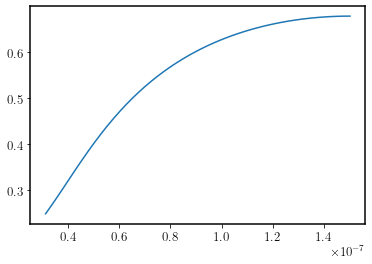

In [178]:
L=3e-7
a=3.1375e-8
x=np.linspace(a,L/2,50)
y=channel_n_vec(x,a,L)
print(channel_t_vec(L/2,a,L))


plt.plot(x,y)



In [289]:
from scipy.optimize import curve_fit

def fit_wall_mob(h,p1, p2, p3, p4, p5, p6, p7):
    return p1 + p2/pow(p3  + h,5) - p4/pow(p5   + h,3) - p6/(p7  + h)

L=3e-7
wetRad=1.56875e-08
xpos=np.array([0.5*L/wetRad,0.25*L/wetRad,0.125*L/wetRad,0.0625*L/wetRad,0.03125*L/wetRad,0.015625*L/wetRad,0.0078125*L/wetRad,0])

tmob=np.array([0.8955,0.8642,0.7653,0.5755,0.2764,0.07962,0.01990,0])
nmob=np.array([0.8479,0.7659,0.5708,0.3141,0.1232,0.03737,0.01060,0])

tmob50=np.array([0.8981,0.8605,0.7711,0.5709,0.2795,0.07817,0.02066,0])
nmob50=np.array([0.8480,0.7658,0.5710,0.3140,0.1232,0.03737,0.01071,0])

poptt, pcovt = curve_fit(fit_wall_mob, xpos, tmob, p0=[1,1,1,16,4,1,1],maxfev=10000000)
poptn, pcovn = curve_fit(fit_wall_mob, xpos, nmob, p0=[1,1,1,16,4,1,1],maxfev=10000000)

poptt50, pcovt50 = curve_fit(fit_wall_mob, xpos, tmob50, p0=[1,1,1,16,4,1,1],maxfev=10000000)
poptn50, pcovn50 = curve_fit(fit_wall_mob, xpos, nmob50, p0=[1,1,1,16,4,1,1],maxfev=10000000)

In [260]:
poptn

array([8.74245824e-01, 4.43143801e+02, 2.89678306e+00, 4.86227516e+01,
       2.52401393e+00, 1.98445562e-03, 8.66798162e-02])

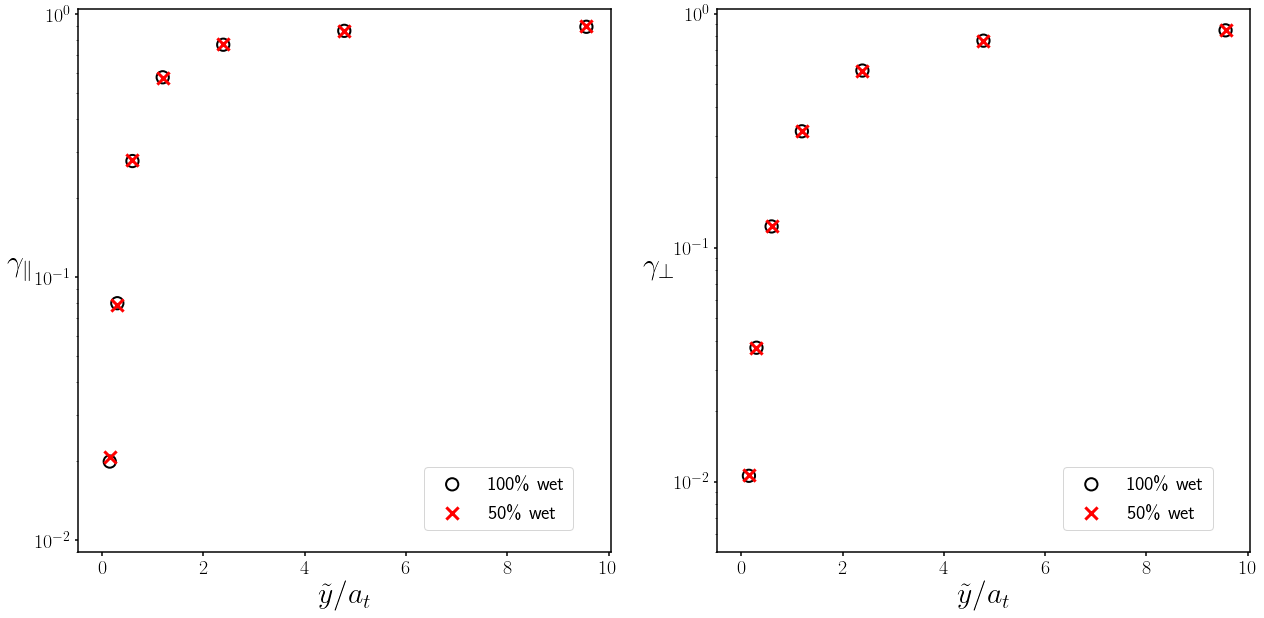

In [292]:
plt.rcParams['mathtext.fontset'] = 'cm'
#plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 
plt.rc('axes', linewidth=1.5)
fig = plt.figure(figsize=[21,10])
plt.subplots_adjust(wspace=0.20)

#xf1=np.linspace(0,2,50)
#f0=fit_wall_mob(xf1,*poptt15r)
#f1=fit_wall_mob(xf1,*poptt3)
#f2=fit_wall_mob(xf1,*poptt6)

#f3=fit_wall_mob(xf1,*poptn15)
#f4=fit_wall_mob(xf1,*poptn3)
#f5=fit_wall_mob(xf1,*poptn6)

ax1 = fig.add_subplot(1,2,1)
ax1.set_yscale('log')
#ax1.plot(xf1,f0,color='black', linewidth=2, label='1.5nm fit')
#ax1.plot(xf1,f2,color='red', linestyle='dashed',linewidth=3.5, label='6nm fit')
ax1.scatter(xpos,tmob,s=150,color='black',facecolors='none',marker='o', linewidths=2, label='100\% wet')
ax1.scatter(xpos,tmob50,s=150,color='red',marker='x', linewidths=3, label='50\% wet')
ax1.set_xlabel(r'$\tilde{y}/a_t$', fontsize=30)
ax1.set_ylabel(r'$\gamma_{\parallel}$', fontsize=30,rotation=0, labelpad=15)
ax1.set_ylim([0.009,1.05])
ax1.tick_params(labelsize=20)
ax1.legend(loc=(0.65,0.04),fontsize=20)
ax1.xaxis.set_tick_params(width=1.5)
ax1.yaxis.set_tick_params(width=1.5)

ax2 = fig.add_subplot(1,2,2)
ax2.set_yscale('log')
#ax2.plot(xf1,f3,color='black', linewidth=2, label='1.5nm fit')
#ax2.plot(xf1,f5,color='red', linestyle='dashed',linewidth=3.5, label='6nm fit')
ax2.scatter(xpos,nmob,s=150,color='black',facecolors='none',marker='o', linewidths=2, label='100\% wet')
ax2.scatter(xpos,nmob50,s=150,color='red',marker='x', linewidths=3, label='50\% wet')
ax2.set_xlabel(r'$\tilde{y}/a_t$', fontsize=30)
ax2.set_ylabel(r'$\gamma_{\bot}$', fontsize=30,rotation=0, labelpad=15)
ax2.set_ylim([0.005,1.05])
ax2.tick_params(labelsize=20)
ax2.legend(loc=(0.65,0.04),fontsize=20)
ax2.xaxis.set_tick_params(width=1.5)
ax2.yaxis.set_tick_params(width=1.5)
fig.savefig("mob3.pdf", bbox_inches = 'tight',
    pad_inches = 0.05)

In [287]:
#1.5nm
L=1.5e-7
wetRad=1.56875e-08
xpos15r=np.array([0.5*L/wetRad,0.25*L/wetRad,0.125*L/wetRad,0.0625*L/wetRad,0.03125*L/wetRad,0.015625*L/wetRad,0.0078125*L/wetRad,0])
tmob15r=np.array([0.7935,0.7358,0.5653,0.2734,0.07888,0.01972,0.004930,0])
nmob15r=np.array([0.7040,0.5645,0.3134,0.1231,0.03734,0.01059,0.002872,0])

poptt15r, pcovt15r = curve_fit(fit_wall_mob, xpos15r, tmob15r, p0=[1,1,1,16,4,1,1],maxfev=10000000)
poptn15r, pcovn15r = curve_fit(fit_wall_mob, xpos15r, nmob15r, p0=[1,1,1,16,4,1,1],maxfev=10000000)

xpos15=np.array([2,1,0.5,0.25,0.125,0.0635,0])
tmob15=np.array([0.7081,0.4923,0.2100 ,0.05522,0.01381 ,0.003563,0])
nmob15=np.array([0.4986,0.2580,0.09141,0.02714,0.007602,0.002104,0])

poptt15, pcovt15 = curve_fit(fit_wall_mob, xpos15, tmob15, p0=[1,1,1,16,4,1,1],maxfev=10000000)
poptn15, pcovn15 = curve_fit(fit_wall_mob, xpos15, nmob15, p0=[1,1,1,16,4,1,1],maxfev=10000000)

#3nm
xpos=np.array([2,1,0.5,0.25,0.125,0.0635,0])
tmob3=np.array([0.7310,0.4997,0.2120 ,0.05574,0.01393 ,0.003596,0])
nmob3=np.array([0.5022,0.2584,0.09148,0.02716,0.007605,0.002105,0])

poptt3, pcovt3 = curve_fit(fit_wall_mob, xpos, tmob3, p0=[1,1,1,16,4,1,1],maxfev=10000000)
poptn3, pcovn3 = curve_fit(fit_wall_mob, xpos, nmob3, p0=[1,1,1,16,4,1,1],maxfev=10000000)


#6nm
xpos=np.array([2,1,0.5,0.25,0.125,0.0635,0])
tmob6=np.array([0.7349,0.5008,0.2123 ,0.05581,0.01395 ,0.003601,0])
nmob6=np.array([0.5023,0.2584,0.09149,0.02716,0.007605,0.002105,0])


poptt6, pcovt6 = curve_fit(fit_wall_mob, xpos, tmob6, p0=[1,1,1,16,4,1,1],maxfev=10000000)
poptn6, pcovn6 = curve_fit(fit_wall_mob, xpos, nmob6, p0=[1,1,1,16,4,1,1],maxfev=10000000)

/usr/local/lib/python3.8/dist-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [263]:
print(poptn15r)

[-3.11038612e+01  7.24698118e+02  2.59720646e+00  4.13848704e+01
  1.79959078e+00 -3.20502020e+04  9.99299583e+02]


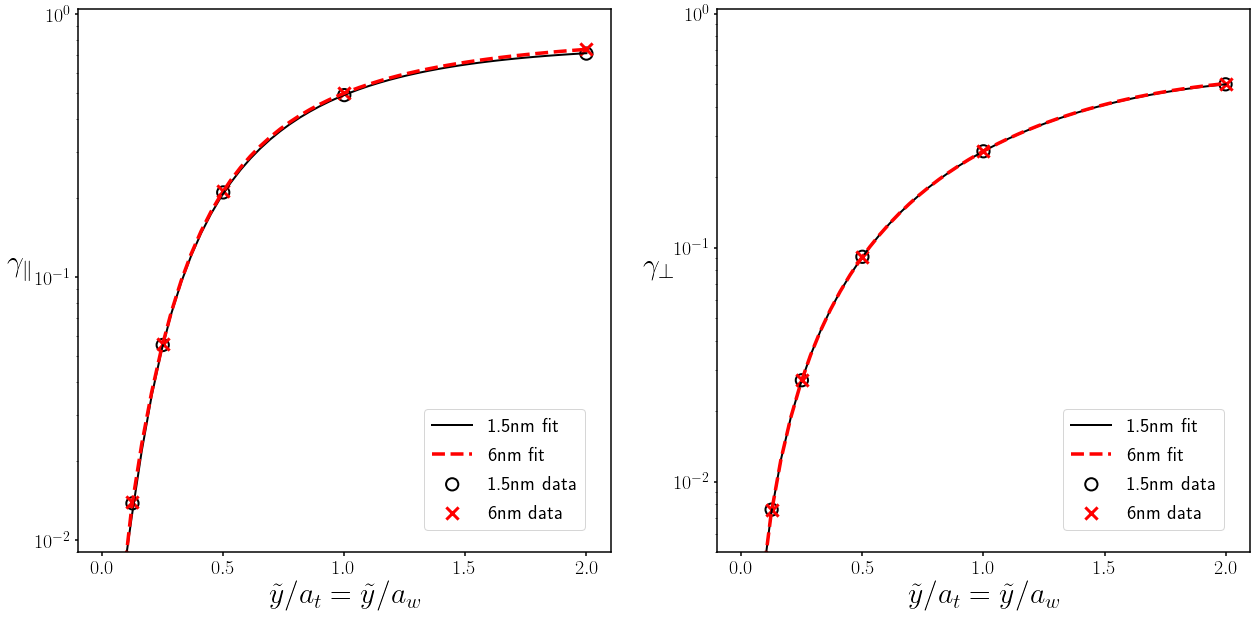

In [288]:
plt.rcParams['mathtext.fontset'] = 'cm'
#plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 
plt.rc('axes', linewidth=1.5)
fig = plt.figure(figsize=[21,10])
plt.subplots_adjust(wspace=0.20)

xf1=np.linspace(0,2,50)
f0=fit_wall_mob(xf1,*poptt15r)
f1=fit_wall_mob(xf1,*poptt3)
f2=fit_wall_mob(xf1,*poptt6)

f3=fit_wall_mob(xf1,*poptn15)
f4=fit_wall_mob(xf1,*poptn3)
f5=fit_wall_mob(xf1,*poptn6)

ax1 = fig.add_subplot(1,2,1)
ax1.set_yscale('log')
ax1.plot(xf1,f0,color='black', linewidth=2, label='1.5nm fit')
ax1.plot(xf1,f2,color='red', linestyle='dashed',linewidth=3.5, label='6nm fit')
ax1.scatter(xpos15,tmob15,s=150,color='black',facecolors='none',marker='o', linewidths=2, label='1.5nm data')
ax1.scatter(xpos,tmob6,s=150,color='red',marker='x', linewidths=3, label='6nm data')
ax1.set_xlabel(r'$\tilde{y}/a_t = \tilde{y}/a_w$', fontsize=30)
ax1.set_ylabel(r'$\gamma_{\parallel}\quad$', fontsize=30,rotation=0, labelpad=15)
ax1.set_ylim([0.009,1.05])
ax1.tick_params(labelsize=20)
ax1.legend(loc=(0.65,0.04),fontsize=20)
ax1.xaxis.set_tick_params(width=1.5)
ax1.yaxis.set_tick_params(width=1.5)

ax2 = fig.add_subplot(1,2,2)
ax2.set_yscale('log')
ax2.plot(xf1,f3,color='black', linewidth=2, label='1.5nm fit')
ax2.plot(xf1,f5,color='red', linestyle='dashed',linewidth=3.5, label='6nm fit')
ax2.scatter(xpos15,nmob15,s=150,color='black',facecolors='none',marker='o', linewidths=2, label='1.5nm data')
ax2.scatter(xpos,nmob6,s=150,color='red',marker='x', linewidths=3, label='6nm data')
ax2.set_xlabel(r'$\tilde{y}/a_t = \tilde{y}/a_w$', fontsize=30)
ax2.set_ylabel(r'$\gamma_{\bot}\quad$', fontsize=30,rotation=0, labelpad=15)
ax2.set_ylim([0.005,1.05])
ax2.tick_params(labelsize=20)
ax2.legend(loc=(0.65,0.04),fontsize=20)
ax2.xaxis.set_tick_params(width=1.5)
ax2.yaxis.set_tick_params(width=1.5)
fig.savefig("mob2.pdf", bbox_inches = 'tight',
    pad_inches = 0.05)

In [48]:
fit_wall_mob(0,*poptt)

-0.0007420656601707654

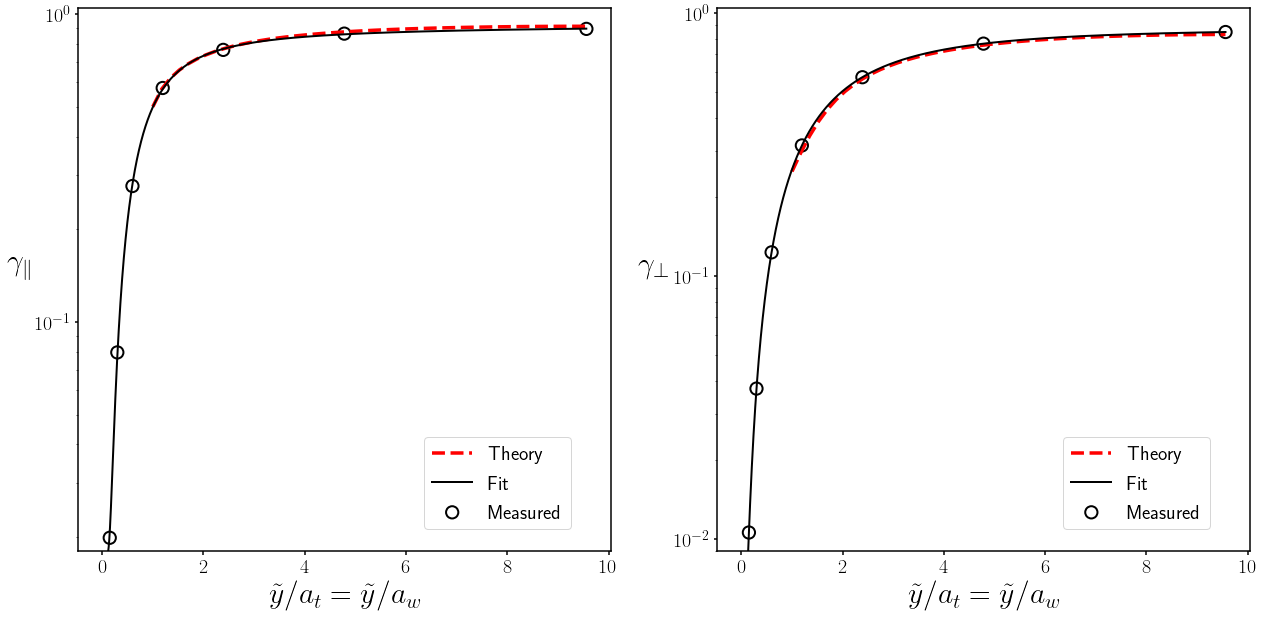

In [286]:

plt.rcParams['mathtext.fontset'] = 'cm'
#plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 
plt.rc('axes', linewidth=1.5)
fig = plt.figure(figsize=[21,10])
plt.subplots_adjust(wspace=0.20)

L=19.125
a=1


x1=np.linspace(1,9.56,50)
y1=channel_t_vec(x1,a,L)

xf1=np.linspace(0,9.56,1000000)
f1=fit_wall_mob(xf1,*poptt)

x2=np.linspace(1,9.56,50)
y2=channel_n_vec(x2,a,L)

xf2=np.linspace(0,9.56,100000)
f2=fit_wall_mob(xf2,*poptn)

ax1 = fig.add_subplot(1,2,1)
ax1.set_yscale('log')
ax1.plot(x1,y1,color='red', linestyle='dashed',linewidth=3.5, label='Theory')
ax1.plot(xf1,f1,color='black', linewidth=2, label='Fit')
ax1.scatter(xpos,tmob,s=150,color='black',facecolors='none',marker='o', linewidths=2, label='Measured')
ax1.set_xlabel(r'$\tilde{y}/a_t = \tilde{y}/a_w$', fontsize=30)
ax1.set_ylabel(r'$\gamma_{\parallel}$', fontsize=30,rotation=0, labelpad=15)
ax1.set_ylim([0.018,1.05])
ax1.tick_params(labelsize=20)
ax1.legend(loc=(0.65,0.04),fontsize=20)
ax1.xaxis.set_tick_params(width=1.5)
ax1.yaxis.set_tick_params(width=1.5)

ax2 = fig.add_subplot(1,2,2)
ax2.set_yscale('log')
ax2.plot(x2,y2,color='red', linestyle='dashed',linewidth=3.5, label='Theory')
ax2.plot(xf2,f2,color='black', linewidth=2, label='Fit')
ax2.scatter(xpos,nmob,s=150,color='black',facecolors='none',marker='o', linewidths=2, label='Measured')
ax2.set_xlabel(r'$\tilde{y}/a_t = \tilde{y}/a_w$', fontsize=30)
ax2.set_ylabel(r'$\gamma_{\bot}$', fontsize=30,rotation=0, labelpad=20)
ax2.set_ylim([0.009,1.05])
ax2.tick_params(labelsize=20)
ax2.legend(loc=(0.65,0.04),fontsize=20)
ax2.xaxis.set_tick_params(width=1.5)
ax2.yaxis.set_tick_params(width=1.5)
fig.savefig("mob1.pdf", bbox_inches = 'tight',
    pad_inches = 0.05)

In [153]:
kB=1.38064852e-16
eta=1e-2
T=300
totalDiff_small=1.331e-05
dx=3e-07/24
wetRad=dx*1.255 # pkernel=4
a=kB*T/(totalDiff_small*eta*math.pi*6.0)
print(3e-07/a)

18.171720440165384


In [165]:
fig.savefig("test.pdf", bbox_inches = 'tight',
    pad_inches = 0.05)

In [233]:
from sympy import *
z = Symbol('z')
p1 = Symbol('p1')
p2 = Symbol('p2')
p3 = Symbol('p3')
p4 = Symbol('p4')
p5 = Symbol('p5')
p6 = Symbol('p6')
p7 = Symbol('p7')
aa = Symbol('aa')

diff(p1 + p2/pow(p3  + z/aa,5) - p4/pow(p5   + z/aa,3) - p6/(p7  + z/aa), z)

-5*p2/(aa*(p3 + z/aa)**6) + 3*p4/(aa*(p5 + z/aa)**4) + p6/(aa*(p7 + z/aa)**2)